# Ahmed Nabil Ibrahim Awaad

## Objective:  In This Assignment, You will analyze different regression models on the weatherHistory.csv (Weather in Szeged 2006-2016)

In [3]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# preprosessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.metrics import classification_report

#model
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


#settings
pd.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
weather_df = pd.read_csv("data/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 2- Data inspection. Clean and scale the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
weather_df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

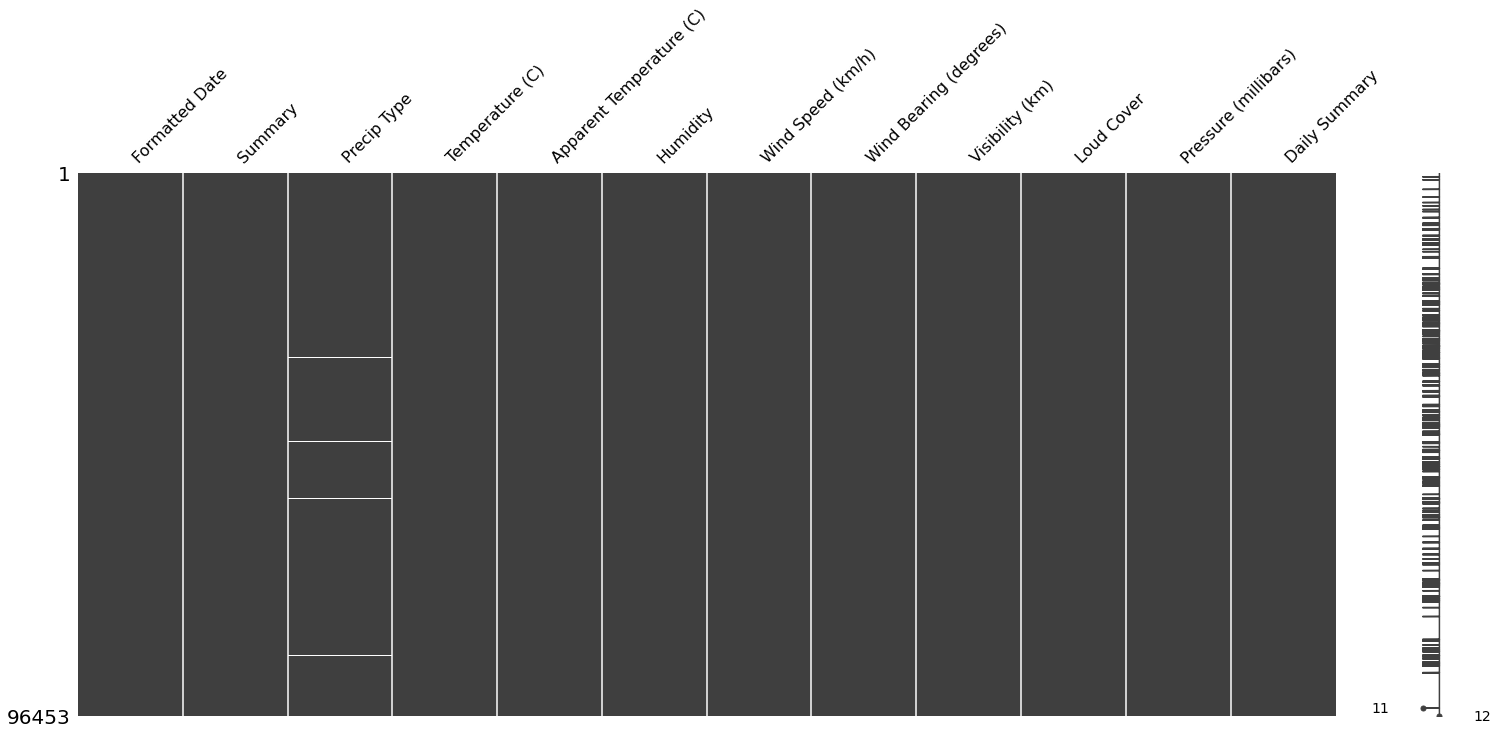

In [7]:
import missingno as msno

msno.matrix(weather_df.sort_values(by=['Humidity']));

In [8]:
# remove missing data
weather_df.dropna(inplace=True)

In [9]:
weather_df.duplicated().sum()

24

In [10]:
# Remove duplicated
weather_df.drop_duplicates(inplace=True)

In [11]:
# Check
weather_df.duplicated().sum()

0

In [12]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),95912.0,11.937975,9.569620,-21.822222,4.594444,12.022222,18.844444,39.905556
Apparent Temperature (C),95912.0,10.859194,10.716711,-27.716667,2.272222,12.022222,18.844444,39.344444
Humidity,95912.0,0.734844,0.195717,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),95912.0,10.806764,6.920504,0.000000,5.812100,9.933700,14.135800,63.852600
Wind Bearing (degrees),95912.0,187.506986,107.378309,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),95912.0,10.362306,4.174204,0.000000,8.355900,10.046400,14.812000,16.100000
Loud Cover,95912.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pressure (millibars),95912.0,1003.146959,117.291484,0.000000,1011.890000,1016.420000,1021.050000,1046.380000


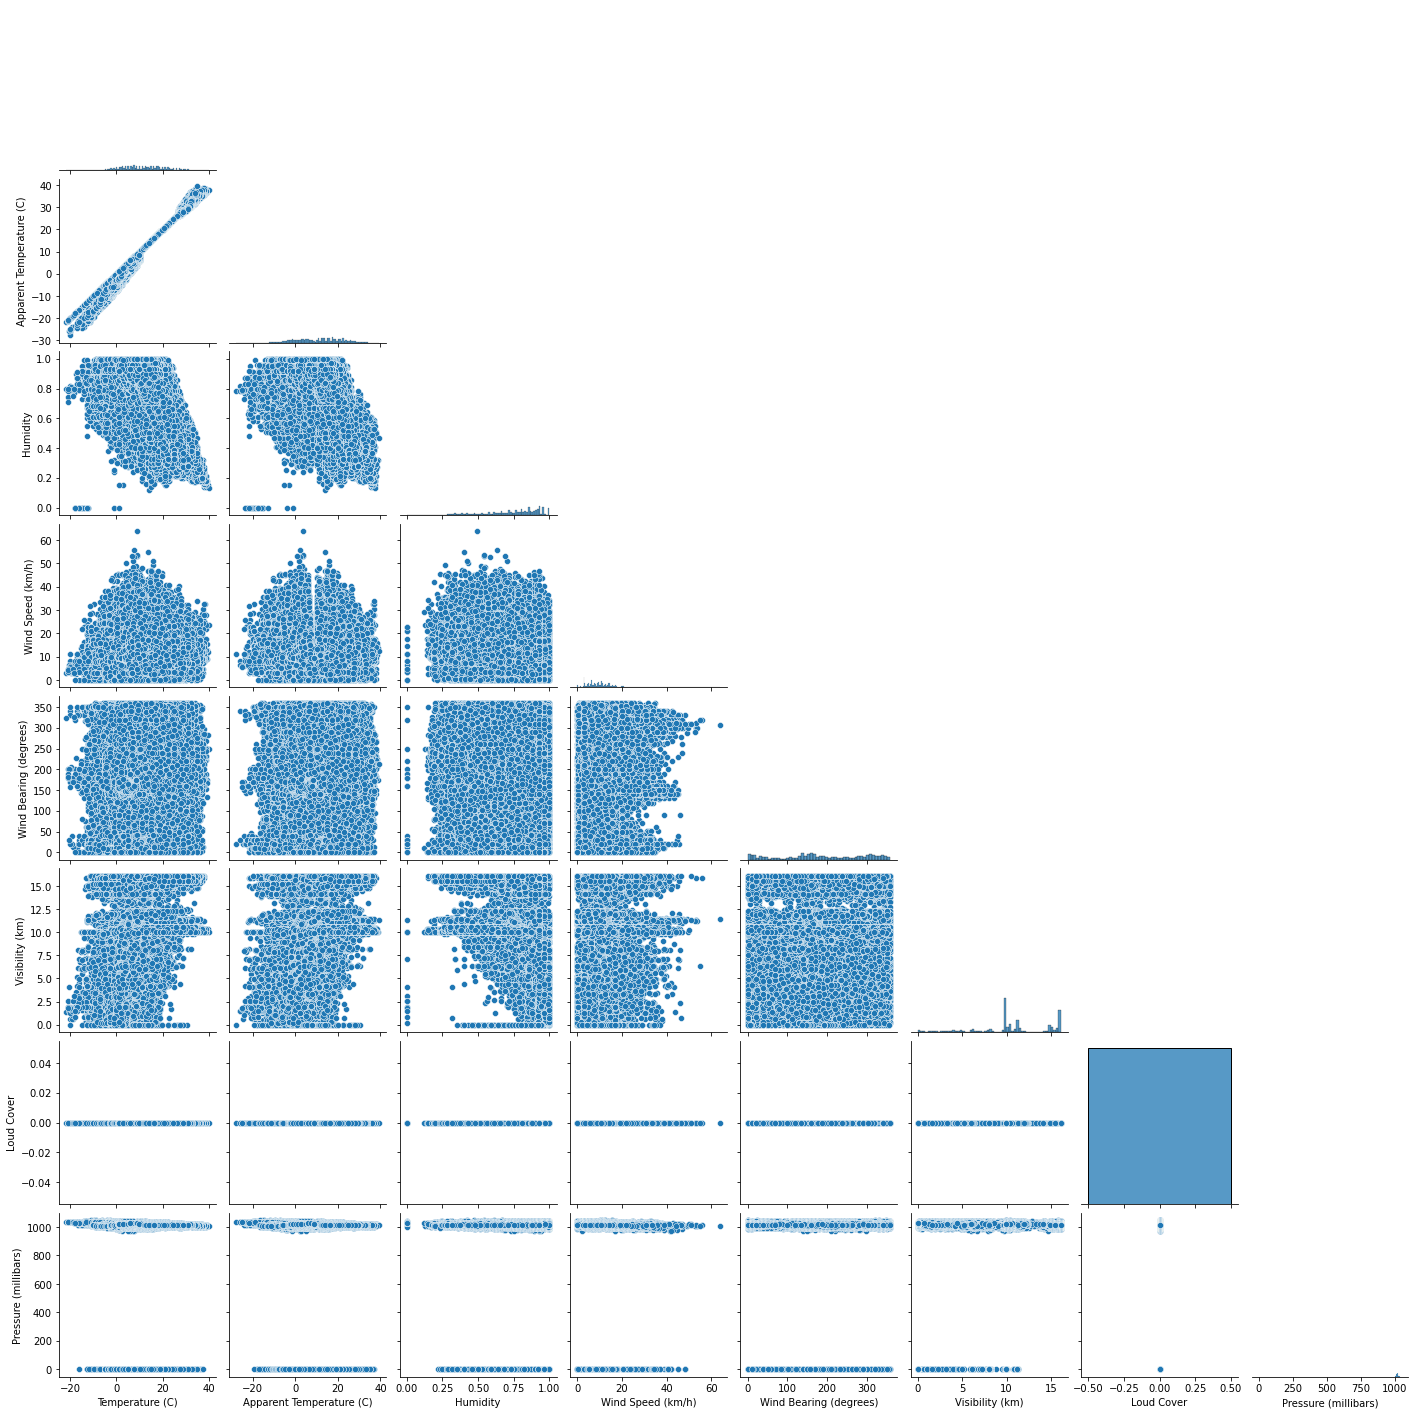

In [13]:
sns.pairplot(data=weather_df, corner=True);

In [14]:
weather_df[['Summary','Daily Summary']]

,Summary,Daily Summary
0,Partly Cloudy,Partly cloudy throughout the day.
1,Partly Cloudy,Partly cloudy throughout the day.
2,Mostly Cloudy,Partly cloudy throughout the day.
3,Partly Cloudy,Partly cloudy throughout the day.
4,Mostly Cloudy,Partly cloudy throughout the day.
...,...,...
96448,Partly Cloudy,Partly cloudy starting in the morning.
96449,Partly Cloudy,Partly cloudy starting in the morning.
96450,Partly Cloudy,Partly cloudy starting in the morning.
96451,Partly Cloudy,Partly cloudy starting in the morning.


In [15]:
# drop Loud cover
weather_df.drop(columns=['Loud Cover'], inplace=True)

In [16]:
# replace pressure Zero values (missing values) with medium
weather_df['Pressure (millibars)'].replace(to_replace=[0], value=[weather_df['Pressure (millibars)'].median()], inplace=True)

In [17]:
weather_df['Pressure (millibars)'].describe()

count    95912.000000
mean      1016.796439
std          7.718585
min        973.780000
25%       1012.190000
50%       1016.420000
75%       1021.050000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [18]:
# working with date
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)

In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95912 non-null  datetime64[ns, UTC]
 1   Summary                   95912 non-null  object             
 2   Precip Type               95912 non-null  object             
 3   Temperature (C)           95912 non-null  float64            
 4   Apparent Temperature (C)  95912 non-null  float64            
 5   Humidity                  95912 non-null  float64            
 6   Wind Speed (km/h)         95912 non-null  float64            
 7   Wind Bearing (degrees)    95912 non-null  float64            
 8   Visibility (km)           95912 non-null  float64            
 9   Pressure (millibars)      95912 non-null  float64            
 10  Daily Summary             95912 non-null  object             
dtypes: datetime64[n

In [20]:
weather_df['month'] = weather_df['Formatted Date'].dt.month
weather_df['hour'] = weather_df['Formatted Date'].dt.hour

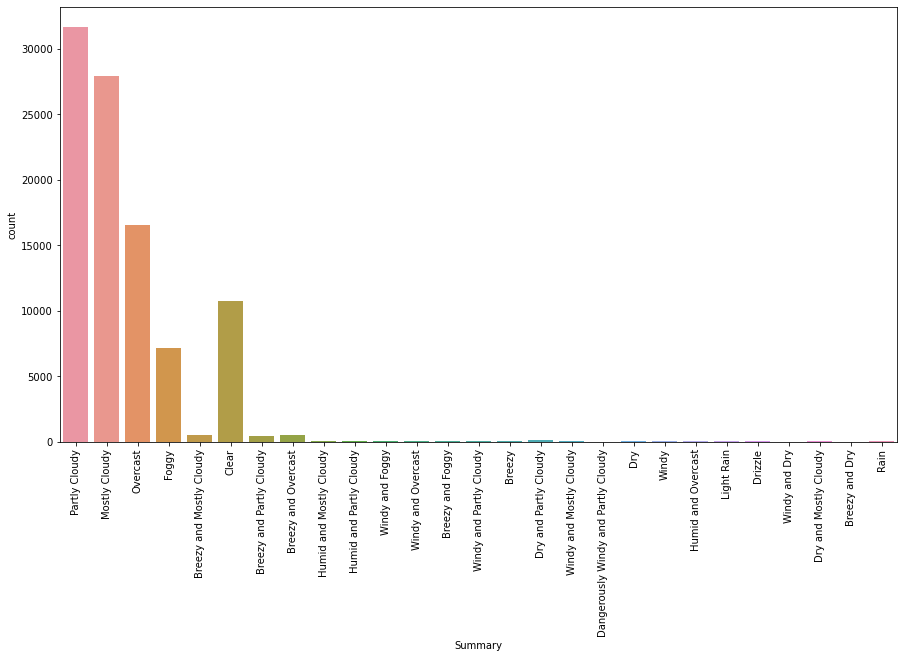

In [21]:
plt.subplots(figsize=(15,8))
sns.countplot(x='Summary', data=weather_df)
plt.xticks(rotation=90);

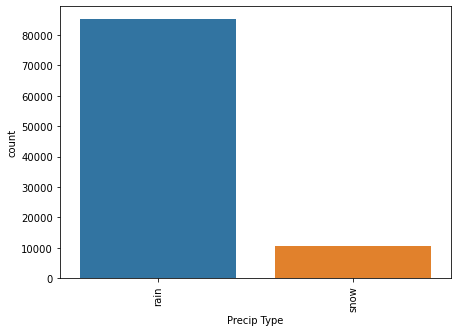

In [22]:
plt.subplots(figsize=(7,5))
sns.countplot(x='Precip Type', data=weather_df)
plt.xticks(rotation=90);

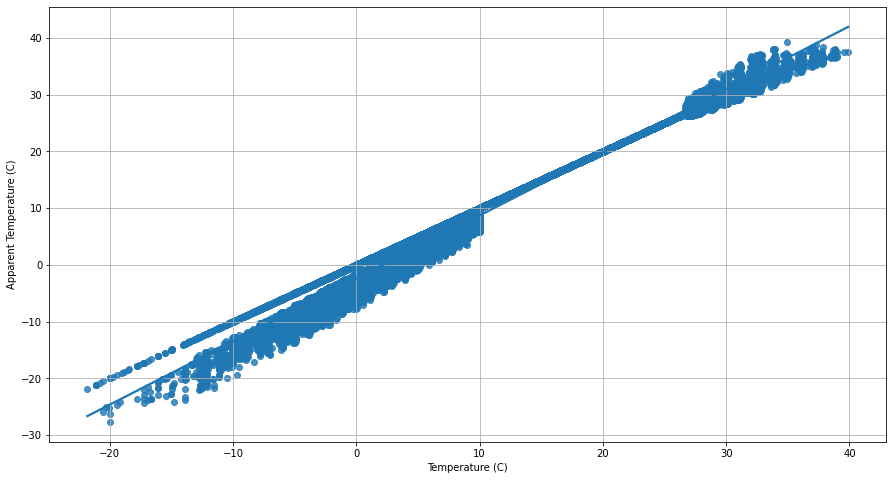

In [23]:
plt.subplots(figsize=(15,8))
sns.regplot(x='Temperature (C)', y='Apparent Temperature (C)', data=weather_df)
plt.grid();

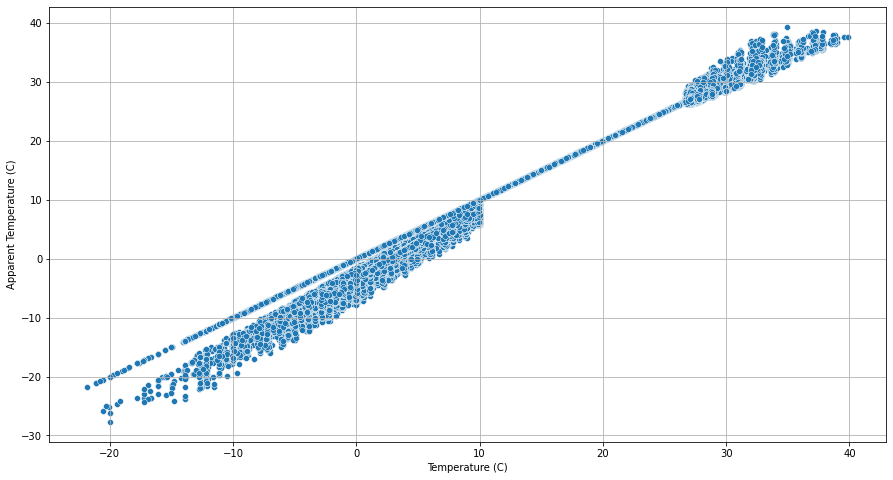

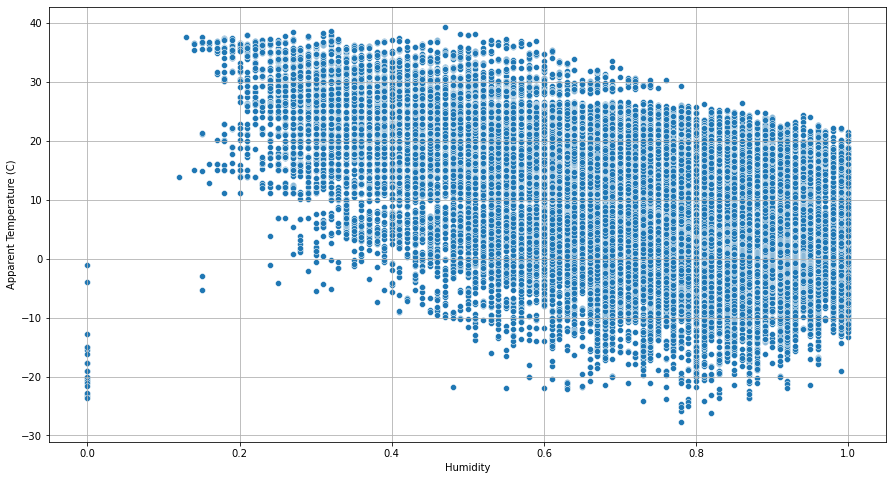

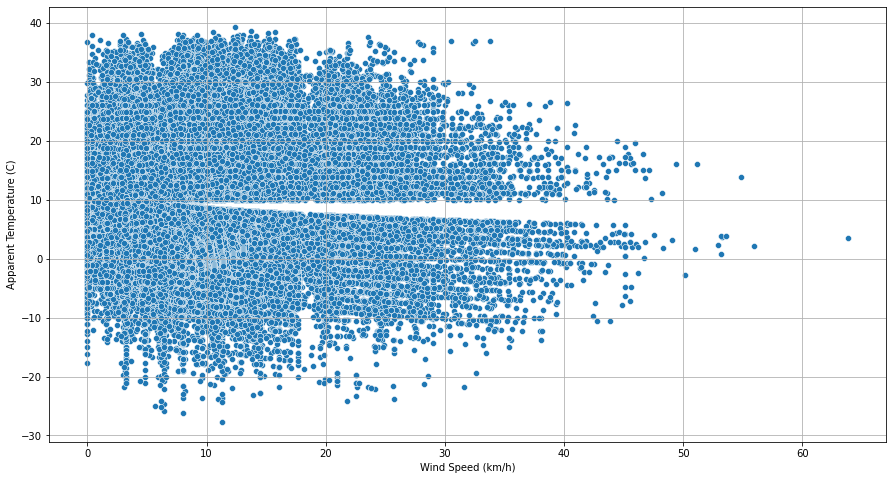

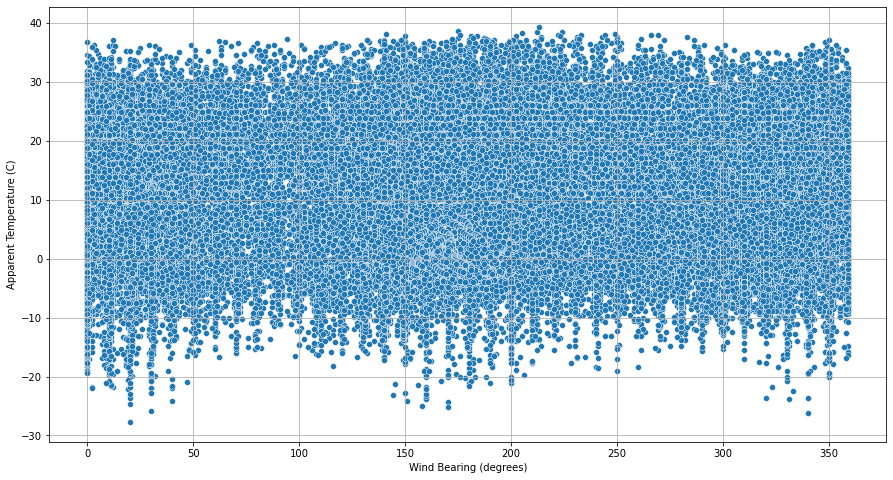

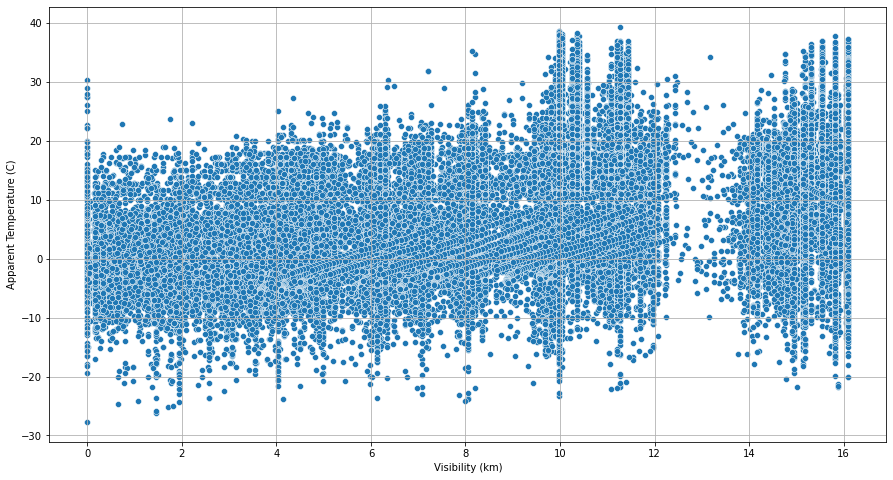

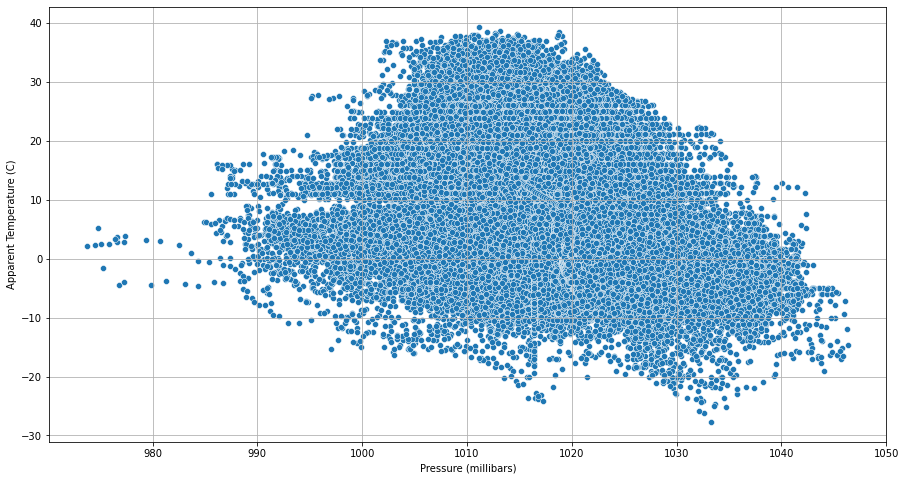

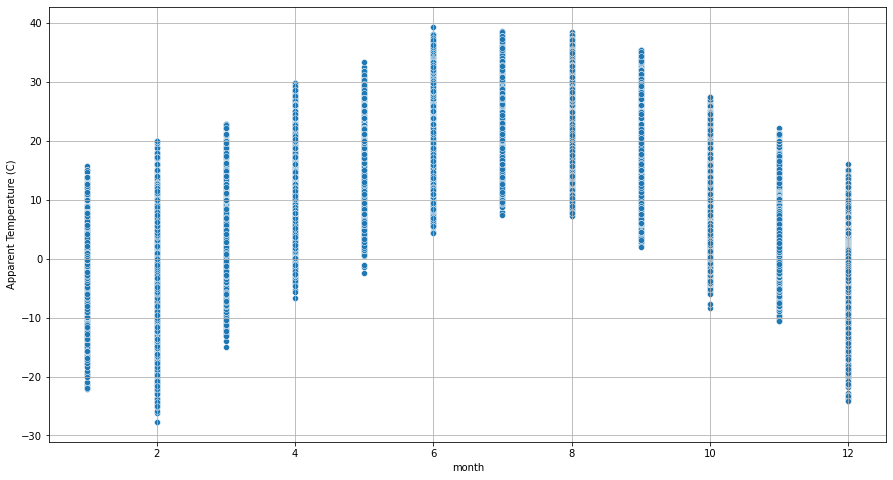

In [24]:
columns_lst = ['Temperature (C)','Humidity', 'Wind Speed (km/h)',
               'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
               'month']
for feature in columns_lst:
    plt.subplots(figsize=(15,8))
    sns.scatterplot(x=feature, y='Apparent Temperature (C)', data=weather_df)
    plt.grid();

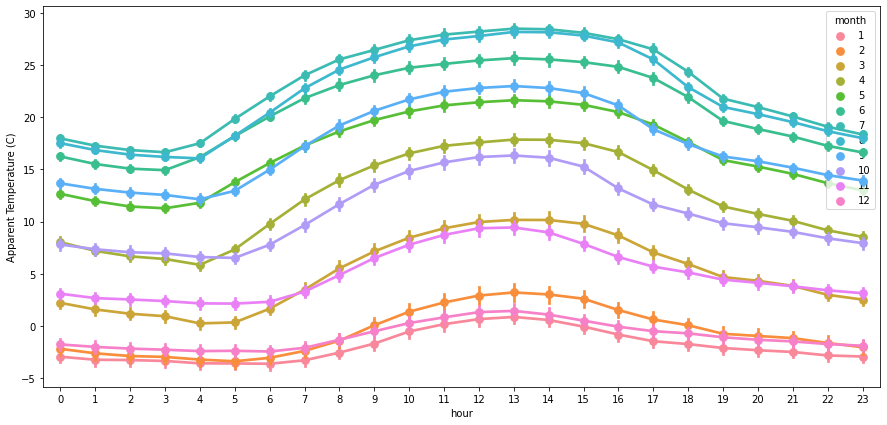

In [25]:
fig = plt.subplots(figsize=(15,7))
sns.pointplot(x='hour', y='Apparent Temperature (C)', data=weather_df, hue='month');

## 3- Choose the relevant features that can be used for regression and predicting the apparent temperature.

In [26]:
# encode category variables using one hot encoder
columns_to_encode =['Precip Type','month', 'hour']
weather_df = pd.get_dummies(weather_df, columns=columns_to_encode, drop_first=True)

In [27]:
# use this encoder to encode
def encode_columns(dataframe):
    le = LabelEncoder()
    
    for col in [ 'Summary' ]:
        dataframe[col] = le.fit_transform(dataframe[col].values)

In [28]:
encode_columns(weather_df)

In [29]:
# scale the parameters
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Temperature (C)', 
                    'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                    'Visibility (km)', 'Pressure (millibars)','Summary']

scaler_model = MinMaxScaler()
scaler_model = scaler_model.fit(weather_df[columns_to_scale])
weather_df[columns_to_scale]  = scaler_model.transform(weather_df[columns_to_scale])

y_scaler = MinMaxScaler()
y_scaler = y_scaler.fit(weather_df[['Apparent Temperature (C)']])
weather_df['Apparent Temperature (C)']  = y_scaler.transform(weather_df[['Apparent Temperature (C)']])


In [30]:
weather_df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Precip Type_snow,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2006-03-31 22:00:00+00:00,0.730769,0.506975,0.523486,0.89,0.221130,0.699164,0.983,0.569559,Partly cloudy throughout the day.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2006-03-31 23:00:00+00:00,0.730769,0.505085,0.521084,0.86,0.223399,0.721448,0.983,0.576446,Partly cloudy throughout the day.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2006-04-01 00:00:00+00:00,0.653846,0.505445,0.553144,0.89,0.061523,0.568245,0.929,0.580716,Partly cloudy throughout the day.,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006-04-01 01:00:00+00:00,0.730769,0.487805,0.501947,0.83,0.220877,0.749304,0.983,0.587190,Partly cloudy throughout the day.,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-04-01 02:00:00+00:00,0.653846,0.495365,0.517356,0.83,0.172970,0.721448,0.983,0.588567,Partly cloudy throughout the day.,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'Precip Type_snow', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

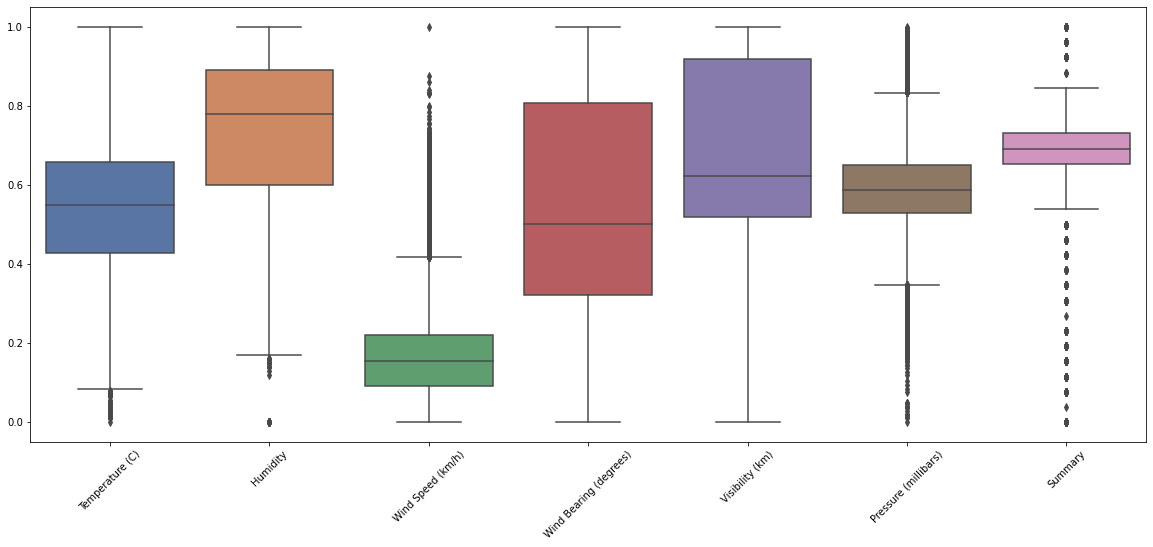

In [32]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.boxplot(data=weather_df[columns_to_scale], palette="deep");

In [33]:
corr_with_aptemp = weather_df.corr()['Apparent Temperature (C)'].drop('Apparent Temperature (C)')
corr_with_aptemp

Summary                   0.142401
Temperature (C)           0.992634
Humidity                 -0.602460
Wind Speed (km/h)        -0.057061
Wind Bearing (degrees)    0.028846
Visibility (km)           0.382675
Pressure (millibars)     -0.285843
Precip Type_snow         -0.566085
month_2                  -0.309430
month_3                  -0.164637
month_4                   0.036272
month_5                   0.166727
month_6                   0.277045
month_7                   0.345313
month_8                   0.324899
month_9                   0.182826
month_10                 -0.001445
month_11                 -0.163281
month_12                 -0.336867
hour_1                   -0.071681
hour_2                   -0.078114
hour_3                   -0.081382
hour_4                   -0.081891
hour_5                   -0.064501
hour_6                   -0.039170
hour_7                   -0.009349
hour_8                    0.019627
hour_9                    0.044420
hour_10             

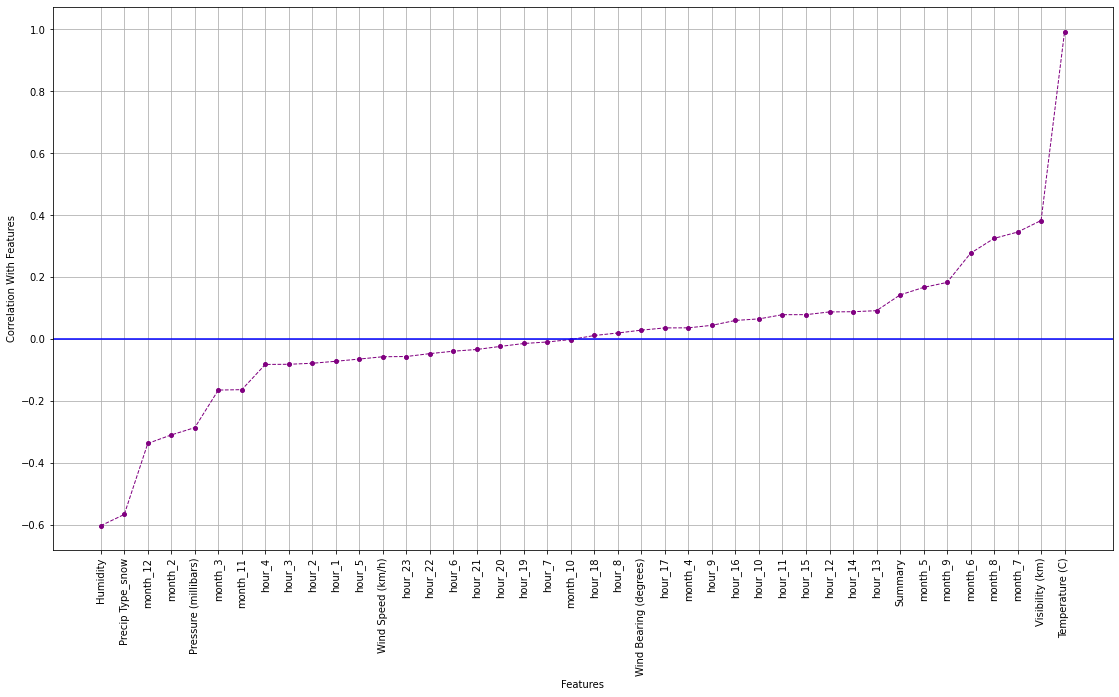

In [34]:
plt.subplots(figsize=(19,10))
plt.grid()
plt.plot((corr_with_aptemp.sort_values()), color="purple", lw=1, ls='--', marker='o', markersize=4)
plt.xticks(rotation=90)
plt.axhline(y=0 , c='b')
plt.xlabel('Features')
plt.ylabel('Correlation With Features')
plt.show()

In [35]:
# Low corrlation between wind bearing and apparent temperature

features = ['Summary', 'Temperature (C)',
        'Humidity', 'Wind Speed (km/h)',
        'Visibility (km)', 'Pressure (millibars)',
        'Precip Type_snow', 'month_2', 'month_3', 'month_4',
        'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
        'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
        'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
        'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
        'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']


In [36]:
X =weather_df[features]
y =weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head(2)

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type_snow,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
21336,0.692308,0.640446,0.90,0.175240,0.926,0.589394,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
82152,0.461538,0.435244,0.96,0.219617,0.039,0.529752,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4- Implement different regression models (Linear, multiple, and Polynomial) to fit your data

In [38]:

models = {
            "LR"    : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "KNNR"  : KNeighborsRegressor(), 
            "SVR"   : SVR(),
            "DT"    : DecisionTreeRegressor(),
            "RF"    : RandomForestRegressor(),
            "XGBR"  : XGBRegressor(),
            "catboost" : CatBoostRegressor()
            }

In [39]:
results = []
for name, model in models.items():
    print('{0:25} : {1:5}'.format('Model name', name ) )
    
#     scores = cross_validation(train_df, model)
#     print('{0:25} : {1:5}'.format('R^2 cross-validation', np.mean(scores) ) )
    
    model.fit(X_train, y_train)
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)
    

    print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )
    
    print('-'*50 + '\n')
    
    temp ={'Name':name,'Training_Score':Training_Score, 'Test_Score':Test_Score}
    results.append(temp)

Model name                : LR   
R^2 Training Score        : 0.9909545895017645
R^2 Test Score            : 0.9910282337307499
--------------------------------------------------

Model name                : Lasso
R^2 Training Score        :   0.0
R^2 Test Score            : -1.6562352830540306e-05
--------------------------------------------------

Model name                : Ridge
R^2 Training Score        : 0.9909522817159011
R^2 Test Score            : 0.9910240294081497
--------------------------------------------------

Model name                : KNNR 
R^2 Training Score        : 0.9659733106162954
R^2 Test Score            : 0.9445264653130294
--------------------------------------------------

Model name                : SVR  
R^2 Training Score        : 0.9444389379619023
R^2 Test Score            : 0.9446857265213474
--------------------------------------------------

Model name                : DT   
R^2 Training Score        :   1.0
R^2 Test Score            : 0.9999054472

In [40]:
results_df = pd.DataFrame(results)
results_df 

,Name,Training_Score,Test_Score
0,LR,0.990955,0.991028
1,Lasso,0.000000,-0.000017
2,Ridge,0.990952,0.991024
3,KNNR,0.965973,0.944526
4,SVR,0.944439,0.944686
5,DT,1.000000,0.999905
6,RF,0.999995,0.999955
7,XGBR,0.999960,0.999930
8,catboost,0.999852,0.999741


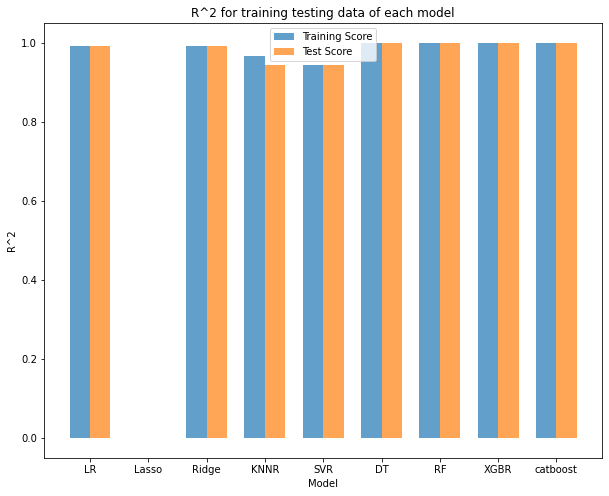

In [41]:
plt.subplots(figsize=(10,8))
ind = np.arange(len(results_df['Name']))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.bar(x=ind,
        height=results_df['Training_Score'],
        width=width,
        alpha=.7,
        label='Training Score')

plt.bar(x=ind+width,
        height=results_df['Test_Score'],
        width=width,
        alpha=.7,
        label='Test Score')

# title and labels
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for training testing data of each model')
locations = ind + width / 2  # xtick locations
labels = results_df['Name']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend()

In [42]:
# multiple model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
def adj_rsquared(X, y_actual, y_pred):
    r2 = r2_score(y_actual,y_pred)
    N=X.shape[0]
    p=X.shape[1]
    x = (1-r2)
    y = (N-1) / (N-p-1)
    adj_rs = (1 - (x * y))
    return adj_rs

In [44]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', model.score(X_train, y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', model.score(X_test, y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = model.predict(X_test)
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train, y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.9999598549397484
R^2 Test Score            : 0.9999303358361238
R^2 adjusted Test Score   : 0.9999302985898572
RMSE Test Score           : 0.08965680233765648
MAE Test Score            : 0.04898571614766375
--------------------------------------------------



### This multiply model is very accurate adjusted R^2 is 0.9999 and MAE is 0.04 degree

In [45]:
# lets try linear model with temperature only
# linear model
linear_model = XGBRegressor()
linear_model.fit(X_train[['Temperature (C)']], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', linear_model.score(X_train[['Temperature (C)']], y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', linear_model.score(X_test[['Temperature (C)']], y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = linear_model.predict(X_test[['Temperature (C)']])
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train[['Temperature (C)']], y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.9896822790997292
R^2 Test Score            : 0.9888282072948645
R^2 adjusted Test Score   : 0.9888280616376083
RMSE Test Score           : 1.1353766630135782
MAE Test Score            : 0.6487921894805804
--------------------------------------------------



### Accuracy still good with temperatue only

In [47]:
X_train['Temperature_2'] = np.power(X_train[['Temperature (C)']], 2)
X_test['Temperature_2'] = np.power(X_test[['Temperature (C)']], 2)

<ipython-input-47-4232f9ec9bf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Temperature_2'] = np.power(X_train[['Temperature (C)']], 2)
<ipython-input-47-4232f9ec9bf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Temperature_2'] = np.power(X_test[['Temperature (C)']], 2)


In [48]:
# lets try Polynomial model with temperature only
# Polynomial model
Polynomial_model = XGBRegressor()
Polynomial_model.fit(X_train[['Temperature (C)','Temperature_2']], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', Polynomial_model.score(X_train[['Temperature (C)','Temperature_2']], y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', Polynomial_model.score(X_test[['Temperature (C)','Temperature_2']], y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = Polynomial_model.predict(X_test[['Temperature (C)','Temperature_2']])
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train[['Temperature (C)','Temperature_2']], y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.9896822790997292
R^2 Test Score            : 0.9888282072948645
R^2 adjusted Test Score   : 0.9888279160293613
RMSE Test Score           : 1.1353766630135782
MAE Test Score            : 0.6487921894805804
--------------------------------------------------



### polynomial model accuracy is the same of linear model

In [50]:
from statsmodels.api import OLS
#
OLS(y_train, X_train[features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.999
Model:                                  OLS   Adj. R-squared (uncentered):              0.999
Method:                       Least Squares   F-statistic:                          2.888e+06
Date:                      Fri, 08 Oct 2021   Prob (F-statistic):                        0.00
Time:                              23:48:17   Log-Likelihood:                      2.1240e+05
No. Observations:                     76729   AIC:                                 -4.247e+05
Df Residuals:                         76688   BIC:                                 -4.243e+05
Df Model:                                41                                                  
Covariance Type:                  nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Summary                 -0.0023      0.000     -6.750      0.000      -0.003      -0.002
Temperature (C)          1.0242      0.001   1414.675      0.000       1.023       1.026
Humidity                 0.0203      0.000     65.644      0.000       0.020       0.021
Wind Speed (km/h)       -0.0863      0.001   -156.732      0.000      -0.087      -0.085
Visibility (km)         -0.0027      0.000    -10.275      0.000      -0.003      -0.002
Pressure (millibars)     0.0165      0.000     33.869      0.000       0.016       0.017
Precip Type_snow        -0.0026      0.000    -11.887      0.000      -0.003      -0.002
month_2                  0.0003      0.000      1.239      0.215      -0.000       0.001
month_3                  0.0094      0.000     33.717      0.000       0.009       0.010
month_4                  0.0170      0.000     55.101      0.000       0.016       0.018
month_5                  0.0153      0.000     45.814      0.000       0.015       0.016
month_6                  0.0095      0.000     26.075      0.000       0.009       0.010
month_7                  0.0063      0.000     16.703      0.000       0.006       0.007
month_8                  0.0052      0.000     13.901      0.000       0.004       0.006
month_9                  0.0120      0.000     35.394      0.000       0.011       0.013
month_10                 0.0126      0.000     41.360      0.000       0.012       0.013
month_11                 0.0068      0.000     23.957      0.000       0.006       0.007
month_12                -0.0006      0.000     -2.371      0.018      -0.001      -0.000
hour_1                  -0.0003      0.000     -0.864      0.387      -0.001       0.000
hour_2                  -0.0004      0.000     -1.034      0.301      -0.001       0.000
hour_3                  -0.0010      0.000     -2.653      0.008      -0.002      -0.000
hour_4                  -0.0015      0.000     -3.996      0.000      -0.002      -0.001
hour_5                  -0.0009      0.000     -2.489      0.013      -0.002      -0.000
hour_6                  -0.0006      0.000     -1.536      0.124      -0.001       0.000
hour_7                   0.0003      0.000      0.724      0.469      -0.000       0.001
hour_8                   0.0009      0.000      2.386      0.017       0.000       0.002
hour_9                   0.0014      0.000      3.630      0.000       0.001       0.002
hour_10                  0.0024      0.000      6.250      0.000       0.002       0.003
hour_11                  0.0023      0.000      5.878      0.000       0.002       0.003
hour_12                  0.0020      0.000      5.200      0.000      

In [51]:
# we can remove this features with high p_value and re run the model

features = ['Summary', 'Temperature (C)',
        'Humidity', 'Wind Speed (km/h)',
        'Visibility (km)', 'Pressure (millibars)',
        'Precip Type_snow',  'month_3', 'month_4',
        'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
        'month_11', 'month_12',  'hour_3', 'hour_4',
        'hour_5', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
        'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17']

X =weather_df[features]
y =weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# final model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
# Train the model
print('{0:25} : {1:5}'.format('Model name', 'score' ) )

print('{0:25} : {1:5}'.format('R^2 Training Score', model.score(X_train, y_train) ) )
print('{0:25} : {1:5}'.format('R^2 Test Score', model.score(X_test, y_test) ) )
#-------------------------------------------------------------------#
y_test_predict = model.predict(X_test)
y_test_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test))
y_test_predict_unscaled = y_scaler.inverse_transform(pd.DataFrame(y_test_predict))

adj_rs_test = adj_rsquared(X_train, y_test_unscaled, y_test_predict_unscaled)
#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('R^2 adjusted Test Score', adj_rs_test ) )

#-------------------------------------------------------------------#
print('{0:25} : {1:5}'.format('RMSE Test Score',np.sqrt(mean_squared_error(y_test_unscaled, y_test_predict_unscaled)) ) )
print('{0:25} : {1:5}'.format('MAE Test Score', mean_absolute_error(y_test_unscaled, y_test_predict_unscaled)) ) 
print('-'*50 + '\n')

Model name                : score
R^2 Training Score        : 0.999957868501714
R^2 Test Score            : 0.9999300075955952
R^2 adjusted Test Score   : 0.9999299802102927
RMSE Test Score           : 0.08986777921297641
MAE Test Score            : 0.049696925480747986
--------------------------------------------------



In [54]:
OLS(y_train, X_train[features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.999
Model:                                  OLS   Adj. R-squared (uncentered):              0.999
Method:                       Least Squares   F-statistic:                          3.947e+06
Date:                      Fri, 08 Oct 2021   Prob (F-statistic):                        0.00
Time:                              23:48:23   Log-Likelihood:                      2.1239e+05
No. Observations:                     76729   AIC:                                 -4.247e+05
Df Residuals:                         76699   BIC:                                 -4.244e+05
Df Model:                                30                                                  
Covariance Type:                  nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Summary                 -0.0022      0.000     -6.689      0.000      -0.003      -0.002
Temperature (C)          1.0247      0.001   1519.956      0.000       1.023       1.026
Humidity                 0.0203      0.000     70.035      0.000       0.020       0.021
Wind Speed (km/h)       -0.0863      0.001   -158.924      0.000      -0.087      -0.085
Visibility (km)         -0.0027      0.000    -10.607      0.000      -0.003      -0.002
Pressure (millibars)     0.0166      0.000     34.834      0.000       0.016       0.017
Precip Type_snow        -0.0026      0.000    -11.939      0.000      -0.003      -0.002
month_3                  0.0092      0.000     37.562      0.000       0.009       0.010
month_4                  0.0168      0.000     61.148      0.000       0.016       0.017
month_5                  0.0150      0.000     50.687      0.000       0.014       0.016
month_6                  0.0092      0.000     28.276      0.000       0.009       0.010
month_7                  0.0060      0.000     17.668      0.000       0.005       0.007
month_8                  0.0049      0.000     14.541      0.000       0.004       0.006
month_9                  0.0117      0.000     38.895      0.000       0.011       0.012
month_10                 0.0124      0.000     46.101      0.000       0.012       0.013
month_11                 0.0066      0.000     26.498      0.000       0.006       0.007
month_12                -0.0008      0.000     -3.343      0.001      -0.001      -0.000
hour_3                  -0.0010      0.000     -3.469      0.001      -0.002      -0.000
hour_4                  -0.0015      0.000     -5.238      0.000      -0.002      -0.001
hour_5                  -0.0009      0.000     -3.282      0.001      -0.001      -0.000
hour_8                   0.0009      0.000      3.087      0.002       0.000       0.001
hour_9                   0.0014      0.000      4.707      0.000       0.001       0.002
hour_10                  0.0024      0.000      8.119      0.000       0.002       0.003
hour_11                  0.0023      0.000      7.566      0.000       0.002       0.003
hour_12                  0.0020      0.000      6.662      0.000       0.001       0.003
hour_13                  0.0025      0.000      8.450      0.000       0.002       0.003
hour_14                  0.0018      0.000      6.076      0.000       0.001       0.002
hour_15                  0.0010      0.000      3.227      0.001       0.000       0.002
hour_16                  0.0013      0.000      4.552      0.000       0.001       0.002
hour_17                  0.0008      0.000      2.892      0.004      